# Pymaceuticals Inc.
---

### Analysis

1. It is evident from the data that Ramicane and Capomulin regimens consistently exhibit lower mean, median, variance, standard deviation, and SEM values compared to other treatments. This observation suggests that Ramicane and Capomulin may be more effective in reducing tumor volume when compared to alternative regimens.

2. Upon further examination, it became apparent that the Capomulin and Ramicane regimens exhibited the highest frequency of observed timepoints for each mouse. This finding suggests that these two treatment regimens were utilized more extensively compared to others, implying their significance and potential effectiveness in the study.

3. Finally, analysis also revealed a very strong correlation (0.84) between mouse weight and average tumor volume in the Capomulin regimen, indicating a significant relationship between the two variables.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pharmaceutical_data_complete = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
pharmaceutical_data_complete.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mouse_count = len(mouse_metadata["Mouse ID"])

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate = pharmaceutical_data_complete.groupby(["Timepoint", "Mouse ID"]).size().reset_index(name='count')
mice_duplicate = mice_duplicate[mice_duplicate["count"] > 1]
mice_duplicate_ID = mice_duplicate["Mouse ID"].unique()
mice_duplicate_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicate_data = pharmaceutical_data_complete[pharmaceutical_data_complete["Mouse ID"].isin(mice_duplicate_ID)]
mouse_duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pharmaceutical_data_cleaned = pharmaceutical_data_complete.drop_duplicates(subset=["Mouse ID"])
pharmaceutical_data_cleaned.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_duplicate_count = len(pharmaceutical_data_cleaned["Mouse ID"].unique()) - 1
mouse_duplicate_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
stats_summary = pharmaceutical_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    ["mean", "median", "var", "std", "sem"])
stats_summary = stats_summary.rename(columns={"mean": "Mean Tumor Volume", "median": "Median Tumor Volume", 
                                              "var": "Tumor Volume Variance", "std": "Tumor Volume Std. Dev.", "sem": "Tumor Volume SEM"})

stats_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats_summary = pharmaceutical_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    ["mean", "median", "var", "std", "sem"])
stats_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

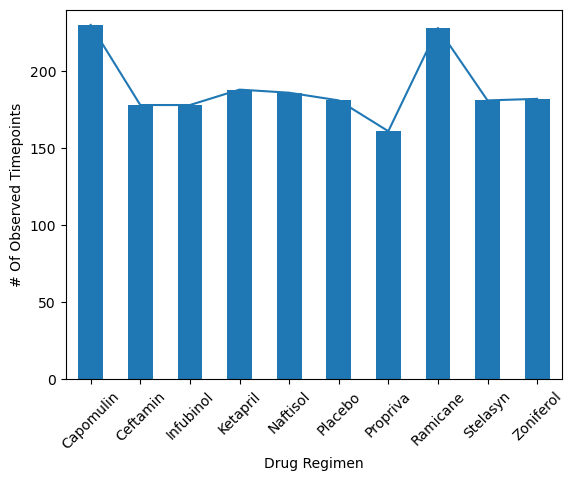

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_bar_chart = pharmaceutical_data_complete.groupby("Drug Regimen").size()
pandas_bar_chart.plot(kind='bar')
pandas_bar_chart.plot(ylim=(0, 240))

plt.xlabel("Drug Regimen")
plt.ylabel("# Of Observed Timepoints")

plt.xticks(rotation=45)
plt.show()

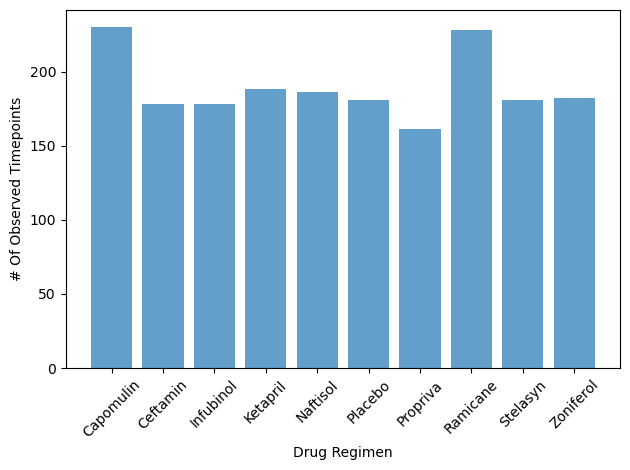

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plyplot_bar_chart = pharmaceutical_data_complete.groupby("Drug Regimen").size()
drug_regimens_plyplot = plyplot_bar_chart.index
row_count_plyplot = plyplot_bar_chart.values

plt.bar(drug_regimens_plyplot, row_count_plyplot, alpha=0.7)

plt.xlabel("Drug Regimen")
plt.ylabel("# Of Observed Timepoints")

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

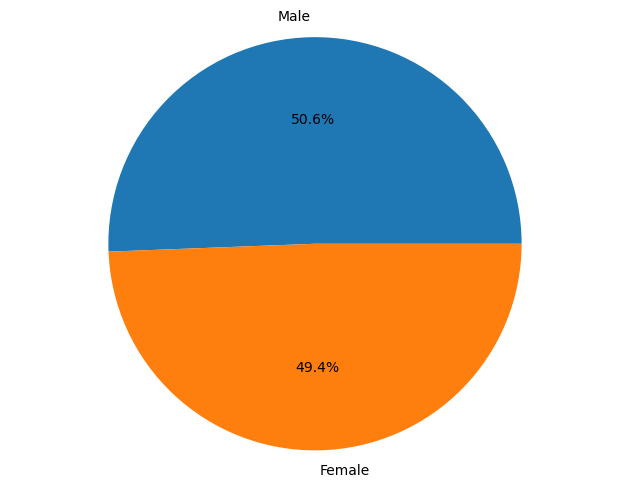

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_pie_chart = pharmaceutical_data_complete["Sex"].value_counts()

pandas_pie_chart.plot(kind="pie", autopct="%1.1f%%")

plt.ylabel('')

plt.axis("equal")
plt.tight_layout()
plt.show()

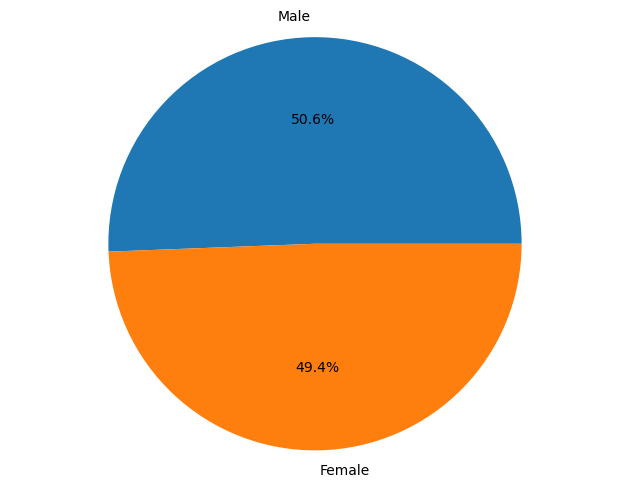

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plyplot_pie_chart = pharmaceutical_data_complete["Sex"].value_counts()

plt.pie(plyplot_pie_chart, labels=plyplot_pie_chart.index, autopct="%1.1f%%")
plt.axis("equal")

plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
specific_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_regimens_df = pharmaceutical_data_complete[pharmaceutical_data_complete["Drug Regimen"].isin(specific_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_regimens_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_dataframe = pd.merge(last_timepoint, pharmaceutical_data_complete, on=["Mouse ID", "Timepoint"], how="left")
merged_dataframe.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = merged_dataframe["Drug Regimen"].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments_list:
    treatment_df = merged_dataframe[(merged_dataframe["Drug Regimen"] == treatment)]
    tumor_vol_list[treatment] = treatment_df["Tumor Volume (mm3)"]

    Q1 = treatment_df["Tumor Volume (mm3)"].quantile(0.25)
    Q3 = treatment_df["Tumor Volume (mm3)"].quantile(0.75)
    IQR = Q3 - Q1
    
# Determine outliers using upper and lower bounds
    lower_bound = Q3 - (1.5 * IQR)
    upper_bound = Q1 + (1.5 * IQR)

    outliers = treatment_df[(treatment_df['Tumor Volume (mm3)'] < lower_bound) | (treatment_df['Tumor Volume (mm3)'] > upper_bound)]

    print("Results for", treatment)
    print("Lower Bound:", lower_bound)
    print("Upper Bound:", upper_bound) 
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

  

Results for Infubinol
Lower Bound: 48.310040109999996
Upper Bound: 71.26431043
Values below 48.310040109999996 could be outliers.
Values above 71.26431043 could be outliers.
Results for Ceftamin
Lower Bound: 40.93320176
Upper Bound: 72.08870612
Values below 40.93320176 could be outliers.
Values above 72.08870612 could be outliers.
Results for Ramicane
Lower Bound: 27.01120119
Upper Bound: 45.20827463
Values below 27.01120119 could be outliers.
Values above 45.20827463 could be outliers.
Results for Capomulin
Lower Bound: 28.486425109999995
Upper Bound: 44.05015203000001
Values below 28.486425109999995 could be outliers.
Values above 44.05015203000001 could be outliers.


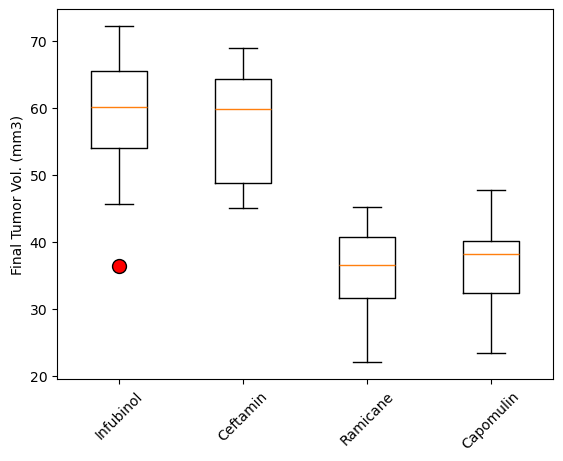

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_list.values(), labels=tumor_vol_list.keys(), flierprops=dict(markerfacecolor='red', markersize=10))
plt.ylabel("Final Tumor Vol. (mm3)")
plt.xticks(rotation=45)
plt.show()


## Line and Scatter Plots

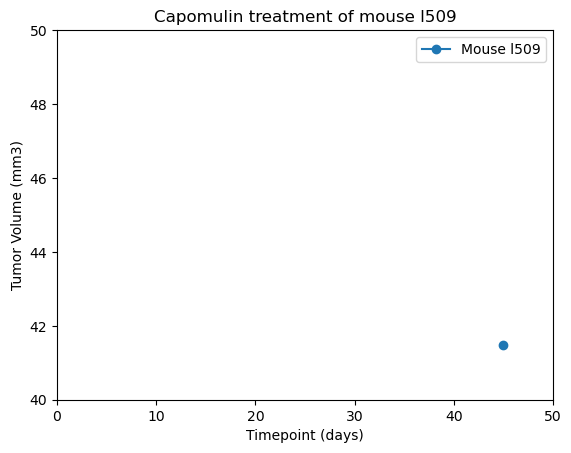

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = merged_dataframe[merged_dataframe["Drug Regimen"] == "Capomulin"]
mouse_l509 = merged_dataframe[merged_dataframe["Mouse ID"] == "l509"]

plt.figure()

for index, row in mouse_l509.iterrows():
    plt.plot(row["Timepoint"], row["Tumor Volume (mm3)"], marker='o', linestyle='-', label=f"Mouse {row['Mouse ID']}")

plt.title("Capomulin treatment of mouse l509")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(0, 50)
plt.ylim(40, 50)
plt.legend()



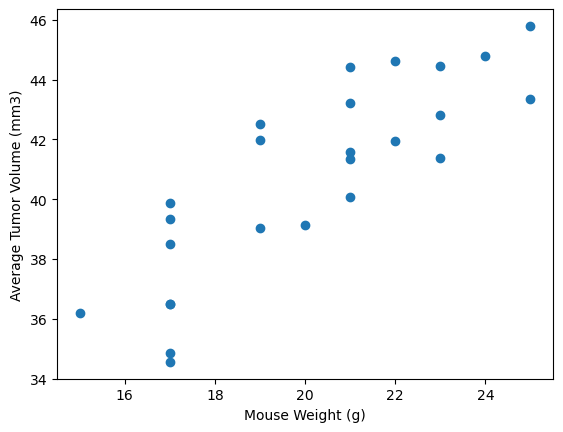

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = pharmaceutical_data_complete[pharmaceutical_data_complete['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

plt.scatter(mouse_weights, avg_tumor_vol)
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Mouse Weight (g)')
plt.show()


## Correlation and Regression

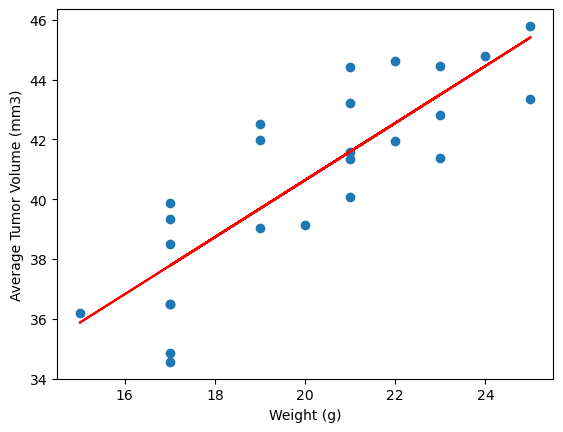

The correlation between mouse weight and average tumor vol. is 0.84


In [18]:
from scipy.stats import linregress

# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = mouse_weights
y_values = avg_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str (round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(f"The correlation between mouse weight and average tumor vol. is {round(st.pearsonr(x_values,y_values)[0],2)}")